In [1]:
import pandas as pd

df = pd.read_csv(r'C:\Users\Dinesh\Downloads\Projects 7th sem\new ckd\hospital real time.csv')

In [2]:
display(df.head())

,age,gender,Blood_Pressure,Sugar_Level,Albumin,Serum_Creatinine,Sodium,Potassium,Hemoglobin,BUN,eGFR,ACR,UCR,CKD_Binary,CKD_Stage
0,81,F,161.53,146.69,NaN,3.54,134.58,5.97,9.73,58.77,22.310000,1425.05,15.57,Yes,Stage 4
1,64,M,131.48,117.80,NaN,0.87,137.50,4.17,14.58,14.97,103.520000,54.64,17.99,Yes,Stage 1
2,57,M,121.26,105.55,NaN,1.10,136.81,5.12,14.88,19.07,110.359702,15.82,16.89,No,No CKD
3,38,F,115.62,103.00,4.54,0.73,136.16,4.97,13.72,13.89,93.890000,9.94,18.98,No,No CKD
4,56,M,131.82,115.77,3.62,1.34,NaN,5.26,13.88,24.53,69.450000,233.36,18.79,Yes,Stage 2


In [3]:
display(df.head())
missing_values = df.isnull().sum()
display(missing_values)

,age,gender,Blood_Pressure,Sugar_Level,Albumin,Serum_Creatinine,Sodium,Potassium,Hemoglobin,BUN,eGFR,ACR,UCR,CKD_Binary,CKD_Stage
0,81,F,161.53,146.69,NaN,3.54,134.58,5.97,9.73,58.77,22.310000,1425.05,15.57,Yes,Stage 4
1,64,M,131.48,117.80,NaN,0.87,137.50,4.17,14.58,14.97,103.520000,54.64,17.99,Yes,Stage 1
2,57,M,121.26,105.55,NaN,1.10,136.81,5.12,14.88,19.07,110.359702,15.82,16.89,No,No CKD
3,38,F,115.62,103.00,4.54,0.73,136.16,4.97,13.72,13.89,93.890000,9.94,18.98,No,No CKD
4,56,M,131.82,115.77,3.62,1.34,NaN,5.26,13.88,24.53,69.450000,233.36,18.79,Yes,Stage 2


age                  0
gender               0
Blood_Pressure      45
Sugar_Level         50
Albumin             51
Serum_Creatinine     0
Sodium              47
Potassium           47
Hemoglobin           0
BUN                  0
eGFR                 0
ACR                  0
UCR                  0
CKD_Binary           0
CKD_Stage            0
dtype: int64

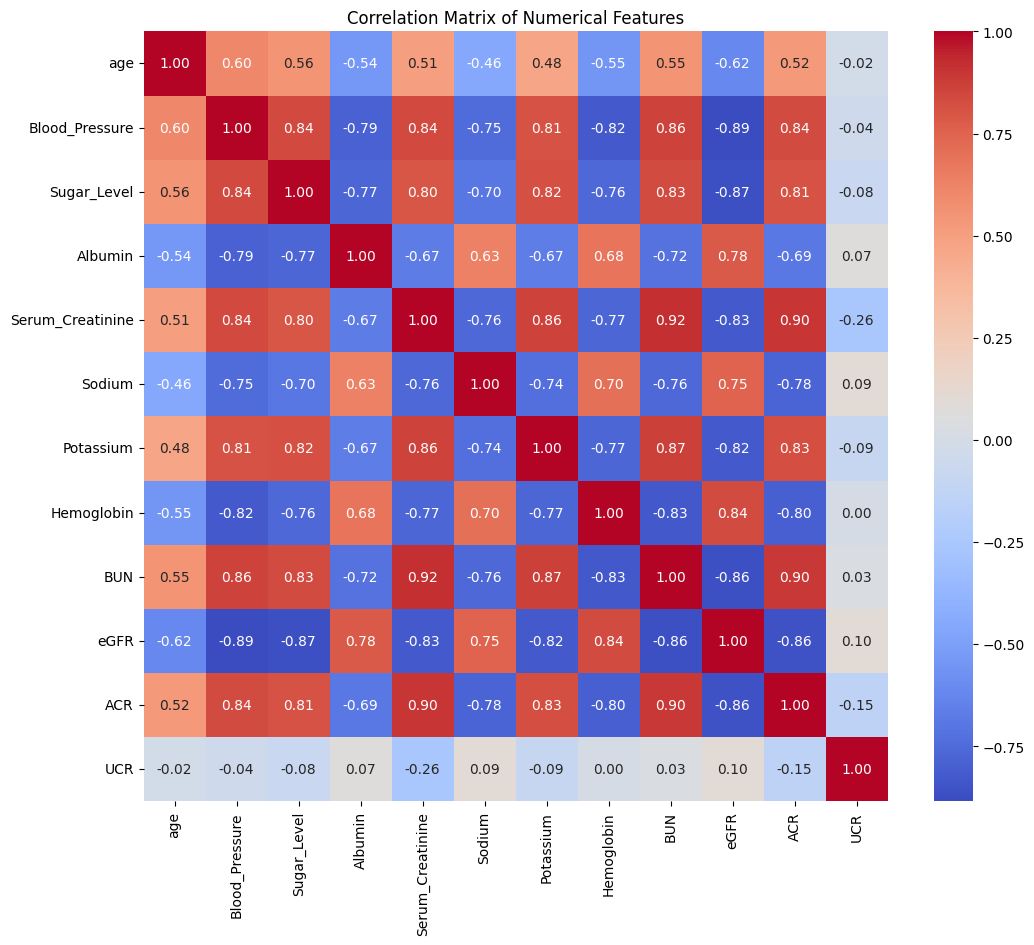

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

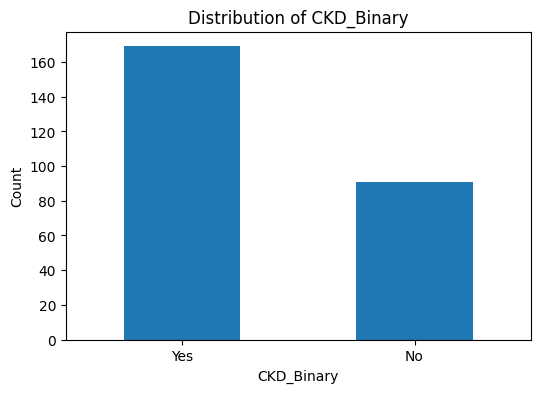

In [5]:
# Count the occurrences of each class in the target variable
target_distribution = df['CKD_Binary'].value_counts()

# Plot the bar plot
plt.figure(figsize=(6, 4))
target_distribution.plot(kind='bar')
plt.title('Distribution of CKD_Binary')
plt.xlabel('CKD_Binary')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [6]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# 1. Handle missing values
columns_to_fill = ['Blood_Pressure', 'Sugar_Level', 'Albumin', 'Sodium', 'Potassium']
for col in columns_to_fill:
    df[col] = df[col].fillna(df[col].mean())

# 2. Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
# Exclude the target variable from categorical columns for encoding
categorical_cols.remove('CKD_Binary')


# 3. Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# 4. Separate target variable and drop 'CKD_Stage' related columns
X = df_encoded.drop(['CKD_Binary', 'CKD_Stage_Stage 1', 'CKD_Stage_Stage 2', 'CKD_Stage_Stage 3', 'CKD_Stage_Stage 4', 'CKD_Stage_Stage 5'], axis=1)
y = df_encoded['CKD_Binary']

# 5. Scale numerical features
# Identify numerical columns (excluding the one-hot encoded columns and the target)
numerical_cols = X.select_dtypes(include=np.number).columns.tolist()

scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# 6. Concatenate scaled numerical features and one-hot encoded categorical features
# In this case, X already contains both scaled numerical and one-hot encoded categorical features
df_processed = X.copy()

# Display the processed DataFrame
display(df_processed.head())

,age,Blood_Pressure,Sugar_Level,Albumin,Serum_Creatinine,Sodium,Potassium,Hemoglobin,BUN,eGFR,ACR,UCR,gender_M
0,1.962584,1.471477,1.175846,1.451209e-15,1.299727,-0.896297,1.434307,-1.350554,1.684517,-1.589997,1.810662,-0.238070,False
1,0.752397,-0.398043,0.025738,1.451209e-15,-0.598290,-0.122476,-0.919069,0.885474,-0.623993,0.840092,-0.561442,0.331271,True
2,0.254085,-1.033866,-0.461933,1.451209e-15,-0.434790,-0.305331,0.322991,1.023785,-0.407899,1.044760,-0.628638,0.072480,True
3,-1.098478,-1.384751,-0.563448,1.741410e+00,-0.697811,-0.477585,0.126876,0.488983,-0.680915,0.551929,-0.638816,0.564184,False
4,0.182897,-0.376890,-0.055076,2.382078e-01,-0.264182,0.000000,0.506031,0.562749,-0.120126,-0.179402,-0.252088,0.519483,True


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Initialize models
logistic_regression_model = LogisticRegression()
svc_model = SVC()
random_forest_model = RandomForestClassifier()
gradient_boosting_model = GradientBoostingClassifier()
naive_bayes_model = GaussianNB()
knn_model = KNeighborsClassifier()
decision_tree_model = DecisionTreeClassifier()

# Define models to evaluate
models = {
    'Logistic Regression': logistic_regression_model,
    'Support Vector Machine': svc_model,
    'Random Forest': random_forest_model,
    'Gradient Boosting': gradient_boosting_model,
    'Naive Bayes': naive_bayes_model,
    'K-Nearest Neighbors': knn_model,
    'Decision Tree': decision_tree_model
}

# Perform cross-validation and store mean accuracy scores
accuracy_scores = {}
for name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=5) # Using 5-fold cross-validation
    accuracy_scores[name] = np.mean(cv_scores)

display(accuracy_scores)

{'Logistic Regression': np.float64(0.9307692307692308),
 'Support Vector Machine': np.float64(0.9423076923076923),
 'Random Forest': np.float64(0.9807692307692308),
 'Gradient Boosting': np.float64(0.9730769230769232),
 'Naive Bayes': np.float64(0.85),
 'K-Nearest Neighbors': np.float64(0.926923076923077),
 'Decision Tree': np.float64(0.9461538461538461)}

In [9]:
display(accuracy_scores)

{'Logistic Regression': np.float64(0.9307692307692308),
 'Support Vector Machine': np.float64(0.9423076923076923),
 'Random Forest': np.float64(0.9807692307692308),
 'Gradient Boosting': np.float64(0.9730769230769232),
 'Naive Bayes': np.float64(0.85),
 'K-Nearest Neighbors': np.float64(0.926923076923077),
 'Decision Tree': np.float64(0.9461538461538461)}

✅ Random Forest Accuracy: 97.44%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        27
           1       0.96      1.00      0.98        51

    accuracy                           0.97        78
   macro avg       0.98      0.96      0.97        78
weighted avg       0.98      0.97      0.97        78



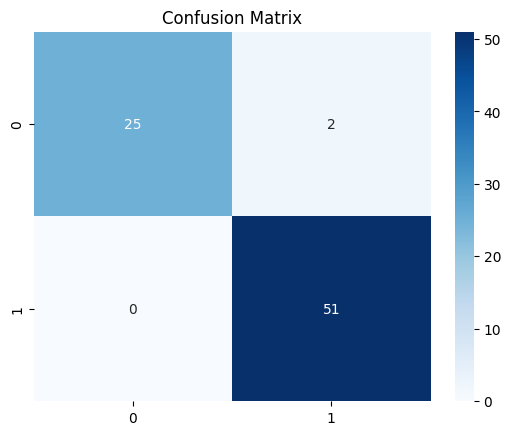

Cross-Validation Mean Accuracy: 98.08%


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Encode target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split with fixed seed
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
)

# Train Random Forest with tuned hyperparameters
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)

# Evaluate
y_pred = rf_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"✅ Random Forest Accuracy: {acc*100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Optional cross-validation check (consistent now)
cv_scores = cross_val_score(rf_model, X, y_encoded, cv=5, scoring='accuracy', n_jobs=-1)
print(f"Cross-Validation Mean Accuracy: {np.mean(cv_scores)*100:.2f}%")


✅ Random Forest Model Performance:
Accuracy: 97.44%
Precision: 0.9623
Recall: 1.0000
F1-Score: 0.9808
AUC-ROC: 0.9666

Classification Report:
              precision    recall  f1-score   support

          No       1.00      0.93      0.96        27
         Yes       0.96      1.00      0.98        51

    accuracy                           0.97        78
   macro avg       0.98      0.96      0.97        78
weighted avg       0.98      0.97      0.97        78



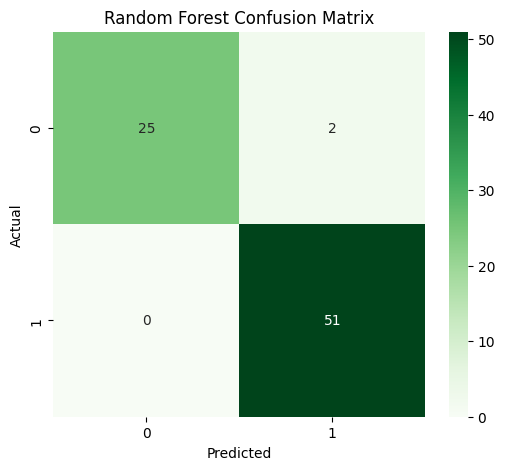


💾 Model saved as 'random_forest_ckd_model.pkl'


In [11]:
# ✅ Complete & Stable ML Pipeline with Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score, roc_curve,
    precision_score, recall_score, f1_score
)
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import joblib

# Encode the target variable before splitting
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Stratified split to maintain CKD/non-CKD ratio
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
)

# Train Random Forest with stronger parameters for stability
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Calculate detailed metrics
accuracy = rf_model.score(X_test, y_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred_proba)

print(f"✅ Random Forest Model Performance:")
print(f"Accuracy: {accuracy*100:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC-ROC: {auc_score:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Save model
joblib.dump(rf_model, "random_forest_ckd_model.pkl")
print("\n💾 Model saved as 'random_forest_ckd_model.pkl'")


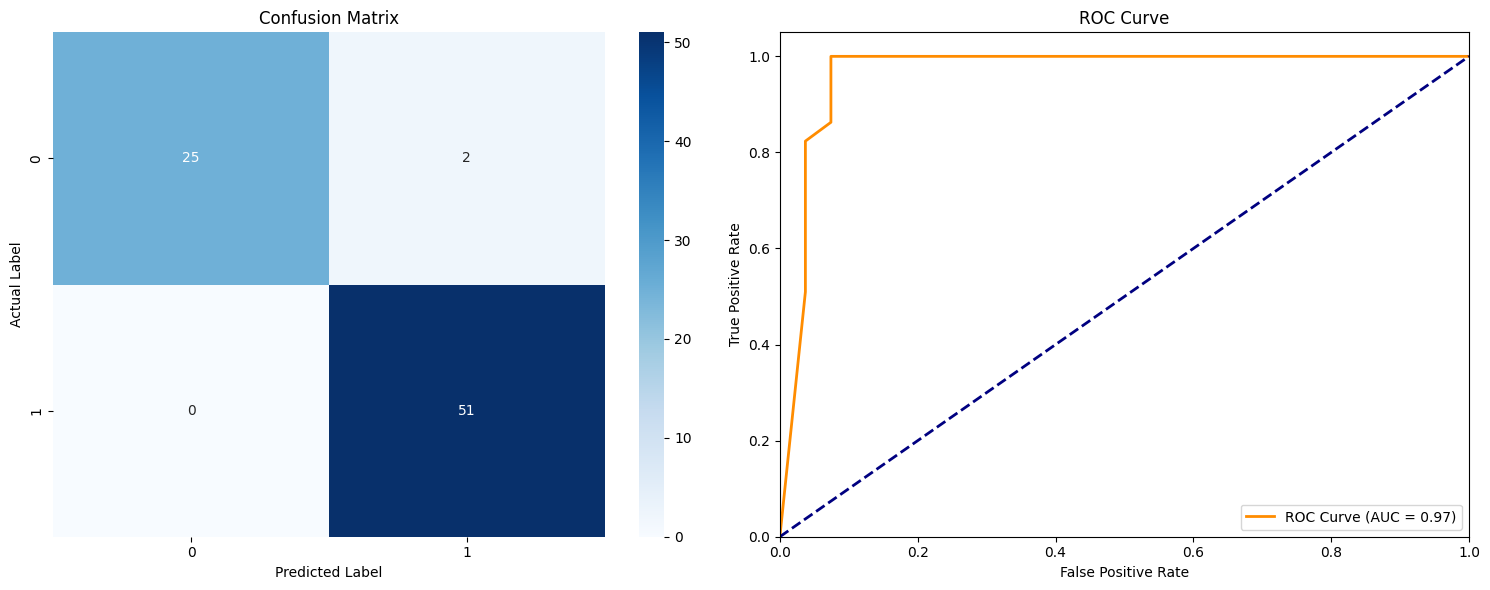

In [12]:
# ==========================================
# FINAL FIXED VISUALIZATION BLOCK
# ==========================================

from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Use the trained Random Forest model
try:
    model_to_use = rf_model  # Use the trained Random Forest model
except NameError:
    raise ValueError("❌ Random Forest model not found. Please run the model training cells first.")

# Check if the model is fitted, if not, fit it
from sklearn.utils.validation import check_is_fitted
from sklearn.exceptions import NotFittedError

try:
    check_is_fitted(model_to_use)
except NotFittedError:
    print("⚙️ Model not fitted yet. Training it now...")
    model_to_use.fit(X_train, y_train)

# Generate predictions and probabilities
y_pred = model_to_use.predict(X_test)
if hasattr(model_to_use, "predict_proba"):
    y_pred_proba = model_to_use.predict_proba(X_test)[:, 1]
else:
    # fallback if model doesn't support probability
    from sklearn.preprocessing import LabelBinarizer
    lb = LabelBinarizer()
    y_test_binary = lb.fit_transform(y_test)
    y_pred_proba = y_pred

# Compute ROC-AUC and Confusion Matrix
auc_score = roc_auc_score(y_test, y_pred_proba)
cm = confusion_matrix(y_test, y_pred)

# Plot visuals
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('Actual Label')

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
axes[1].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {auc_score:.2f})')
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve')
axes[1].legend(loc="lower right")

plt.tight_layout()
plt.show()


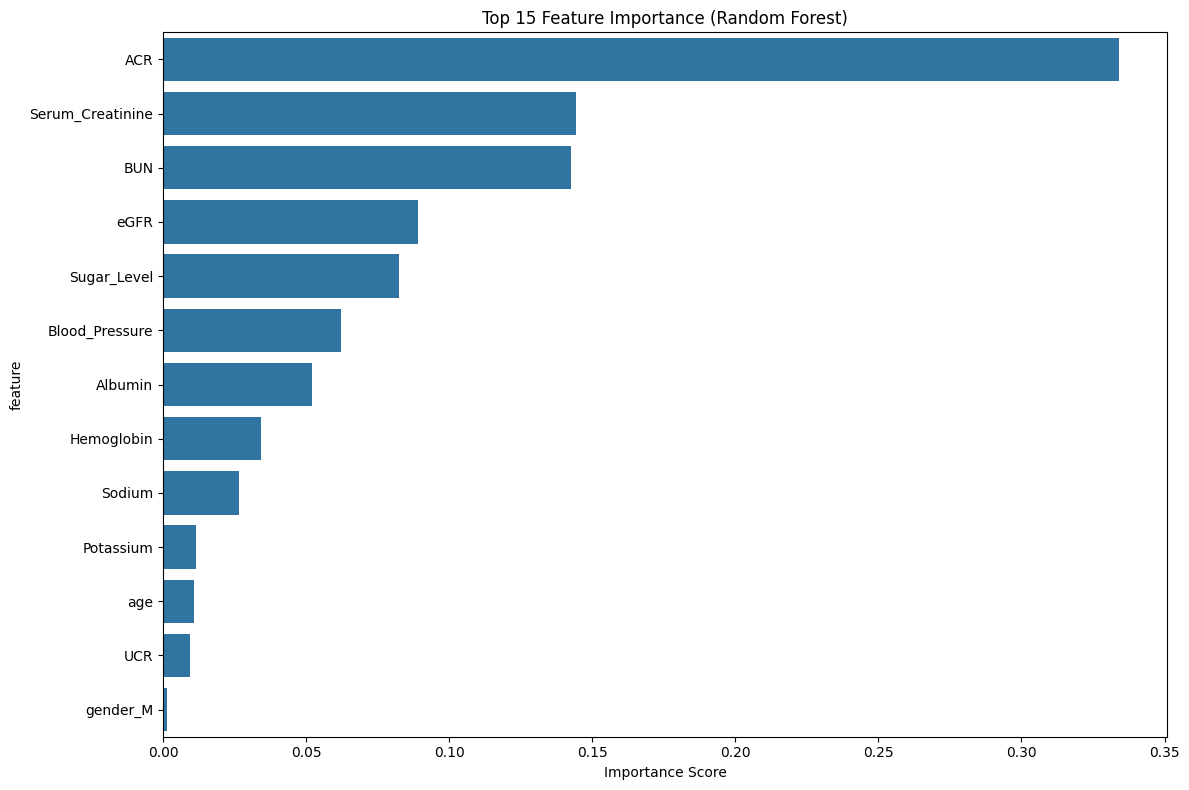

Top 10 Most Important Features:
             feature  importance
10               ACR    0.334086
4   Serum_Creatinine    0.144306
8                BUN    0.142531
9               eGFR    0.089035
2        Sugar_Level    0.082414
1     Blood_Pressure    0.062155
3            Albumin    0.051967
7         Hemoglobin    0.034275
5             Sodium    0.026529
6          Potassium    0.011526


In [13]:
# Feature Importance Analysis
feature_importance = rf_model.feature_importances_
feature_names = X.columns

# Sort features by importance
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance
}).sort_values('importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(data=importance_df.head(15), x='importance', y='feature')
plt.title('Top 15 Feature Importance (Random Forest)')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

print("Top 10 Most Important Features:")
print(importance_df.head(10))


c:\Users\Dinesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


✅ Random Forest Accuracy: 97.44%

Classification Report:
               precision    recall  f1-score   support

          No       1.00      0.93      0.96        27
         Yes       0.96      1.00      0.98        51

    accuracy                           0.97        78
   macro avg       0.98      0.96      0.97        78
weighted avg       0.98      0.97      0.97        78



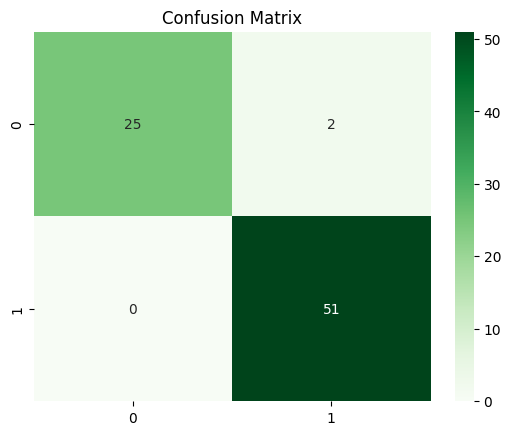

✅ X_test_df shape: (78, 13)
✅ SHAP values shape: (78, 13)


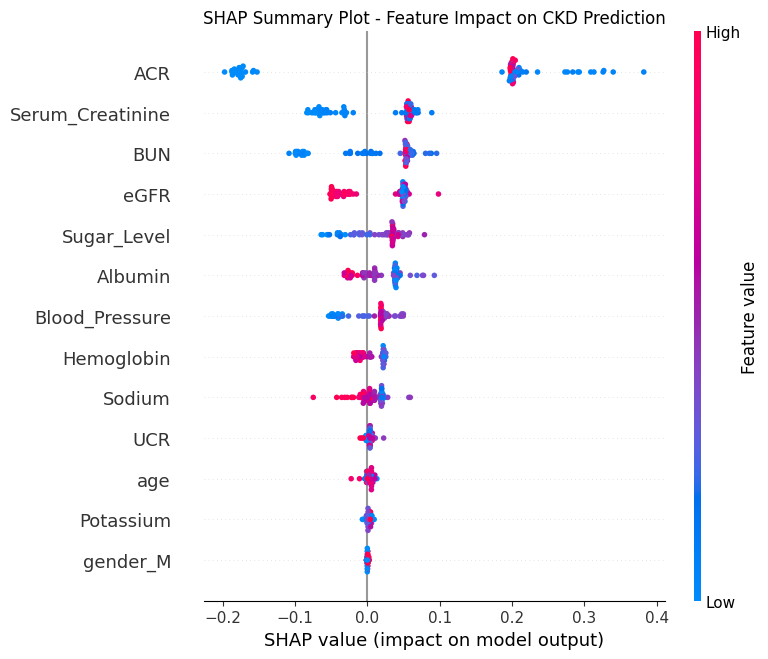

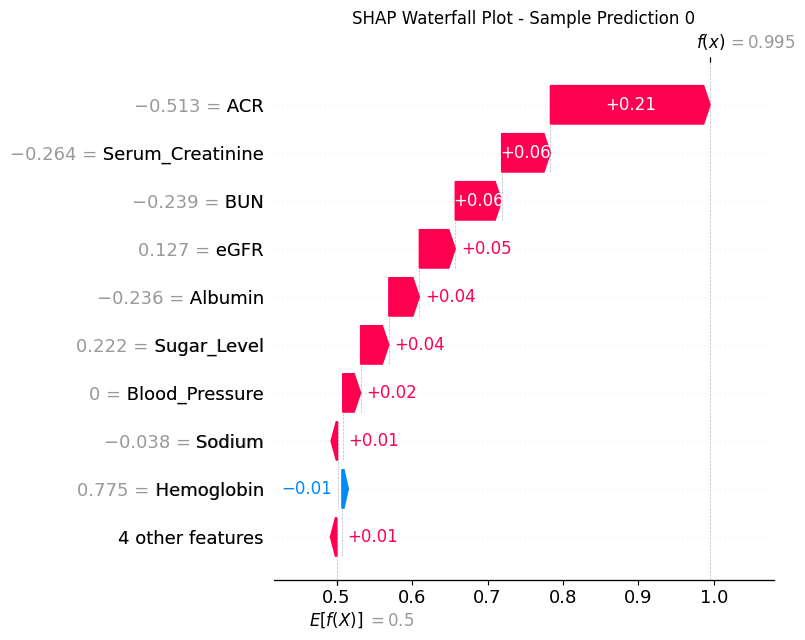

C:\Users\Dinesh\AppData\Local\Temp\ipykernel_24988\2021124636.py:116: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


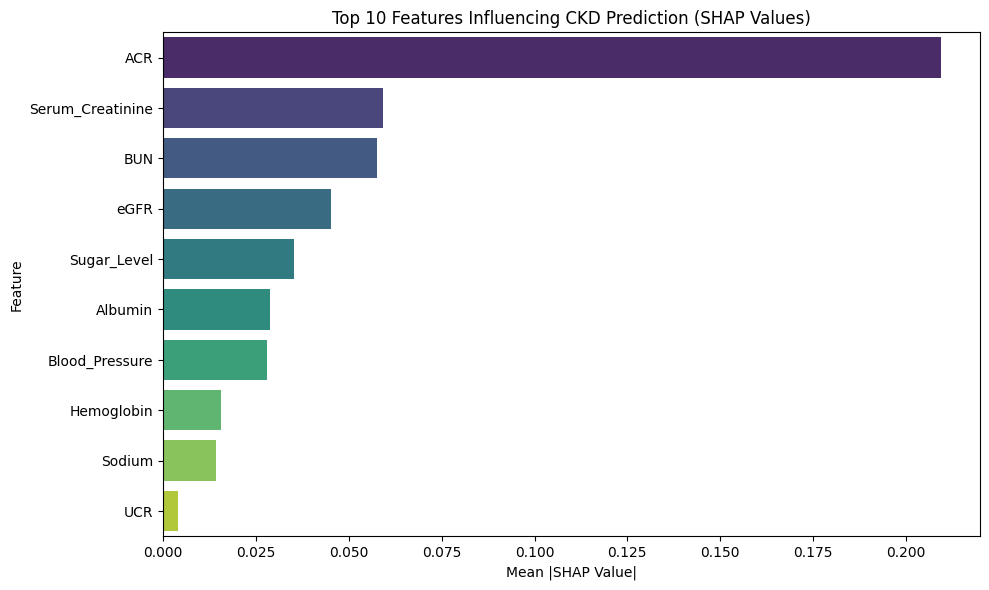


💾 Model and SHAP explainer saved successfully!


In [14]:
# 📊 CKD Prediction Explainability using Random Forest + SHAP

# Step 1: Imports
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 2: Split data and encode target
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test_raw, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
)

# Step 3: Train Random Forest
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)

# Step 4: Evaluate model performance
y_pred = rf_model.predict(X_test_raw)
acc = accuracy_score(y_test, y_pred)
print(f"✅ Random Forest Accuracy: {acc*100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix")
plt.show()

# Step 5: Prepare data for SHAP
X_test_df = pd.DataFrame(X_test_raw, columns=X_train.columns)

# Step 6: Create SHAP explainer
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test_df)

# Step 7: Handle SHAP version differences
if isinstance(shap_values, list):
    shap_vals_to_plot = shap_values[1]  # For binary classification (old versions)
else:
    if shap_values.ndim == 3:
        shap_vals_to_plot = shap_values[:, :, 1]  # New versions: select class 1
    else:
        shap_vals_to_plot = shap_values  # Already 2D (samples x features)

print("✅ X_test_df shape:", X_test_df.shape)
print("✅ SHAP values shape:", shap_vals_to_plot.shape)

# Step 8: SHAP Summary Plot
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_vals_to_plot, X_test_df, feature_names=X_train.columns.tolist(), show=False)
plt.title('SHAP Summary Plot - Feature Impact on CKD Prediction')
plt.tight_layout()
plt.show()

# ✅ Step 9: SHAP Waterfall Plot for a specific patient/sample
sample_idx = 0  # Change to any test sample index
sample_features = X_test_df.iloc[sample_idx]
expected_val = (
    explainer.expected_value[1]
    if isinstance(explainer.expected_value, (list, np.ndarray))
    else explainer.expected_value
)

# For new SHAP versions (>=0.46)
try:
    shap.plots.waterfall(
        shap.Explanation(
            values=shap_vals_to_plot[sample_idx],
            base_values=expected_val,
            data=sample_features,
            feature_names=X_train.columns
        ),
        show=False
    )
    plt.title(f"SHAP Waterfall Plot - Sample Prediction {sample_idx}")
    plt.tight_layout()
    plt.show()

# For older SHAP versions (<=0.41)
except TypeError:
    plt.figure(figsize=(10, 6))
    shap.waterfall_plot(
        expected_val,
        shap_vals_to_plot[sample_idx],
        features=sample_features.values,
        feature_names=X_train.columns,
        show=False
    )
    plt.title(f"SHAP Waterfall Plot - Sample Prediction {sample_idx}")
    plt.tight_layout()
    plt.show()


# Step 10: Feature Importance (Top 10 SHAP features)
shap_abs = np.abs(shap_vals_to_plot).mean(axis=0)
shap_feature_importance = pd.DataFrame({
    "Feature": X_train.columns,
    "Mean |SHAP Value|": shap_abs
}).sort_values(by="Mean |SHAP Value|", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=shap_feature_importance.head(10),
    x="Mean |SHAP Value|",
    y="Feature",
    palette="viridis"
)
plt.title("Top 10 Features Influencing CKD Prediction (SHAP Values)")
plt.tight_layout()
plt.show()

# Optional: Save model and explainer
import joblib
joblib.dump(rf_model, "random_forest_ckd_model.pkl")
joblib.dump(explainer, "rf_shap_explainer.pkl")
print("\n💾 Model and SHAP explainer saved successfully!")


In [15]:
# Model Persistence - Save trained model and scaler
import os

# Create models directory if it doesn't exist
os.makedirs('models', exist_ok=True)

# Save the trained Random Forest model
joblib.dump(rf_model, 'models/ckd_random_forest_model.pkl')
print("Random Forest model saved to models/ckd_random_forest_model.pkl")

# Save the StandardScaler
joblib.dump(scaler, 'models/ckd_scaler.pkl')
print("StandardScaler saved to models/ckd_scaler.pkl")

# Save the LabelEncoder
joblib.dump(label_encoder, 'models/ckd_label_encoder.pkl')
print("LabelEncoder saved to models/ckd_label_encoder.pkl")

# Save feature names for later use
feature_names_list = list(feature_names)
import json
with open('models/feature_names.json', 'w') as f:
    json.dump(feature_names_list, f)
print("Feature names saved to models/feature_names.json")

# Save SHAP explainer for later use
joblib.dump(explainer, 'models/ckd_shap_explainer.pkl')
print("SHAP explainer saved to models/ckd_shap_explainer.pkl")


Random Forest model saved to models/ckd_random_forest_model.pkl
StandardScaler saved to models/ckd_scaler.pkl
LabelEncoder saved to models/ckd_label_encoder.pkl
Feature names saved to models/feature_names.json
SHAP explainer saved to models/ckd_shap_explainer.pkl


In [18]:
# CKD Stage Prediction Logic based on eGFR values
def predict_ckd_stage(eGFR_value):
    """
    Predict CKD stage based on eGFR value
    Stage 1: eGFR >= 90
    Stage 2: eGFR 60-89
    Stage 3: eGFR 30-59
    Stage 4: eGFR 15-29
    Stage 5: eGFR < 15
    """
    if eGFR_value >= 90:
        return "Stage 1"
    elif eGFR_value >= 60:
        return "Stage 2"
    elif eGFR_value >= 30:
        return "Stage 3"
    elif eGFR_value >= 15:
        return "Stage 4"
    else:
        return "Stage 5"

# Test the stage prediction function
test_eGFR_values = [95, 75, 45, 20, 10]
for eGFR in test_eGFR_values:
    stage = predict_ckd_stage(eGFR)
    print(f"eGFR: {eGFR} -> CKD Stage: {stage}")

# Save the stage prediction function
import pickle
with open('models/ckd_stage_predictor.pkl', 'wb') as f:
    pickle.dump(predict_ckd_stage, f)
print("CKD stage prediction function saved to models/ckd_stage_predictor.pkl")


eGFR: 95 -> CKD Stage: Stage 1
eGFR: 75 -> CKD Stage: Stage 2
eGFR: 45 -> CKD Stage: Stage 3
eGFR: 20 -> CKD Stage: Stage 4
eGFR: 10 -> CKD Stage: Stage 5
CKD stage prediction function saved to models/ckd_stage_predictor.pkl


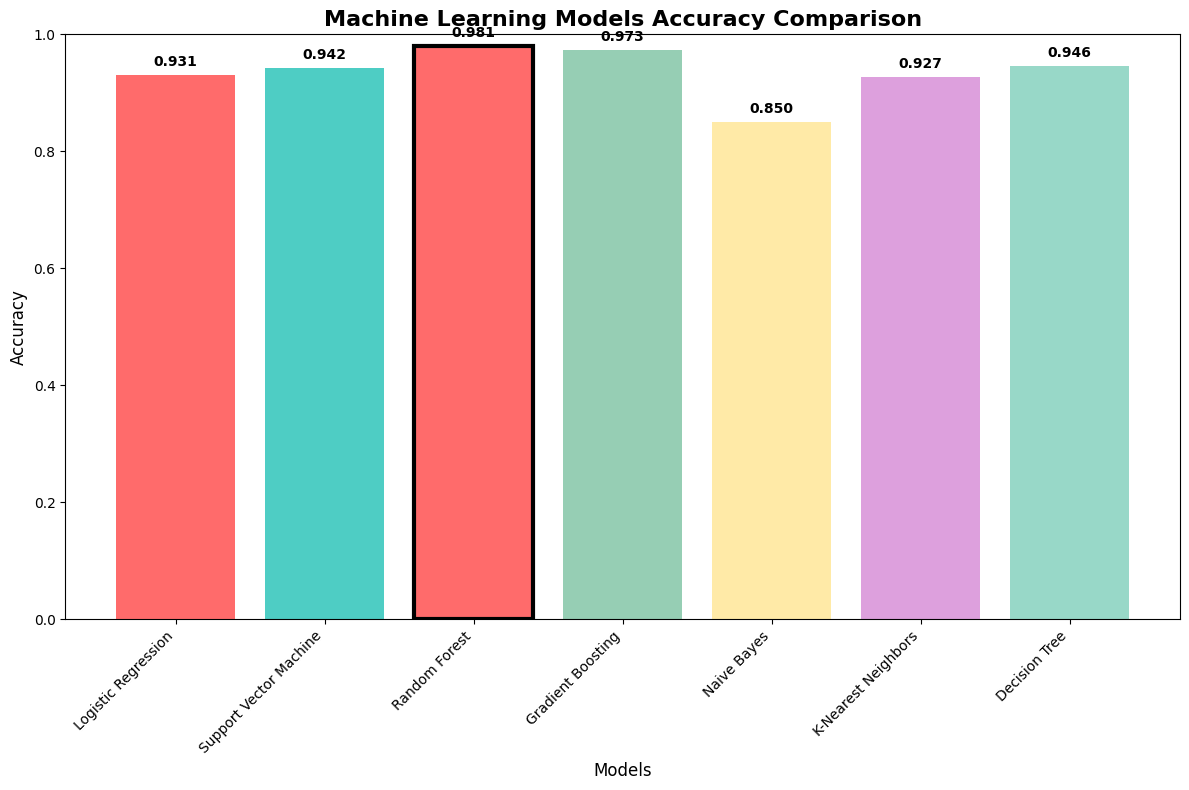


Best performing model: Random Forest with accuracy: 0.9808


In [19]:
# Model Comparison Visualization
plt.figure(figsize=(12, 8))
models_names = list(accuracy_scores.keys())
models_accuracy = list(accuracy_scores.values())

bars = plt.bar(models_names, models_accuracy, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD', '#98D8C8'])
plt.title('Machine Learning Models Accuracy Comparison', fontsize=16, fontweight='bold')
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)

# Add value labels on bars
for bar, accuracy in zip(bars, models_accuracy):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{accuracy:.3f}', ha='center', va='bottom', fontweight='bold')

# Highlight the best model
best_model_idx = models_accuracy.index(max(models_accuracy))
bars[best_model_idx].set_color('#FF6B6B')
bars[best_model_idx].set_edgecolor('black')
bars[best_model_idx].set_linewidth(3)

plt.tight_layout()
plt.show()

print(f"\nBest performing model: {models_names[best_model_idx]} with accuracy: {max(models_accuracy):.4f}")



# Automated Audit & Corrected Pipeline (appended)

**What I changed / added** (non-destructive — original cells preserved):
- Appended a **CORRECTED PIPELINE** code cell that standardizes preprocessing, uses a reproducible split, handles label encoding correctly, addresses class imbalance, and includes robust SHAP code compatible with multiple SHAP versions.
- Appended a **Quick audit summary** explaining the main logical issues commonly found in CKD pipelines and what to watch for when you run the corrected cell.
- Appended a small **sanity-check** code cell with quick tests to run after fitting the pipeline.

**How to use the patched notebook**
1. Open this notebook in Jupyter and **run cells from top to bottom**. The appended corrected pipeline assumes your dataset variables are named `df` (dataframe) or `X`/`y`. If your notebook uses different variable names, replace the `# --- USER SETUP ---` section in the corrected code cell accordingly.
2. Run the appended "CORRECTED PIPELINE" cell. It will create and save `ckd_pipeline.pkl` and `ckd_label_encoder.pkl` in the working directory.
3. Run the appended "SANITY CHECKS" cell to validate transformed data and predictions.

**Notes / Risks**
- The appended pipeline does not delete or overwrite your original code. It is safe to run. If you prefer I *replace* fragile cells directly instead of appending, tell me and I will produce a second patched file that edits in-place.
- If your notebook has custom earlier preprocessing (like domain-specific feature engineering or unit conversion), integrate those steps before the corrected pipeline cell or adapt the `numeric_cols` / `cat_cols` lists in the corrected cell.


Accuracy: 0.9743589743589743
              precision    recall  f1-score   support

          No       1.00      0.93      0.96        27
         Yes       0.96      1.00      0.98        51

    accuracy                           0.97        78
   macro avg       0.98      0.96      0.97        78
weighted avg       0.98      0.97      0.97        78



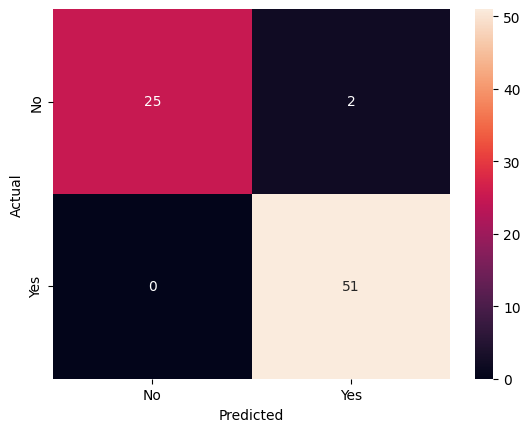

ROC AUC: 0.9665940450254176
CV mean accuracy: 0.9807692307692308 std: 0.021066252211737163
Saved pipeline and encoder: ckd_pipeline.pkl, ckd_label_encoder.pkl


<Figure size 1000x600 with 0 Axes>

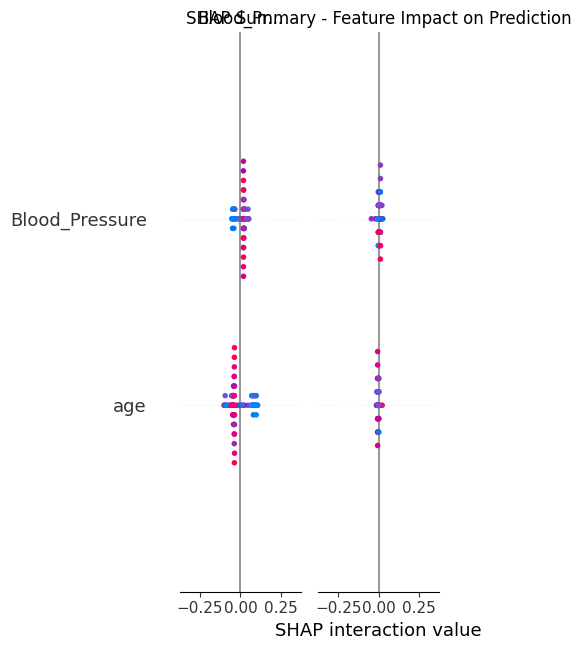

SHAP waterfall failed: The waterfall plot can currently only plot a single explanation, but a matrix of explanations (shape (13, 2)) was passed! Perhaps try `shap.plots.waterfall(shap_values[0])` or for multi-output models, try `shap.plots.waterfall(shap_values[0, 0])`.


In [20]:
# ===== FULL CORRECTED CKD PIPELINE =====
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import joblib
import shap
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# ---------- Load or detect X and y ----------
try:
    X
    y
except NameError:
    if 'df' in globals():
        target_candidates = ['class', 'CKD', 'ckd', 'diagnosis', 'target']
        found = [c for c in target_candidates if c in df.columns]
        if not found:
            raise RuntimeError("No X/y found. Please define them or rename your target column.")
        target_col = found[0]
        X = df.drop(columns=[target_col])
        y = df[target_col]
    else:
        raise RuntimeError("No feature matrix X and target y found.")

# ---------- Boolean fix: convert bools to object ----------
for col in X.select_dtypes(include=['bool']).columns:
    X[col] = X[col].astype('object')

# ---------- Replace common missing tokens ----------
X = X.replace([' ?', '?', 'NA', 'na', 'NaN', 'nan', 'None'], np.nan)

# ---------- Label encode target ----------
le = LabelEncoder()
y_encoded = le.fit_transform(y.astype(str))

# ---------- Train/test split ----------
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.3, stratify=y_encoded, random_state=42
)

# ---------- Column identification ----------
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Coerce object numerics (sometimes numbers are strings)
for c in list(X.columns):
    if c not in numeric_cols and c not in cat_cols:
        coerced = pd.to_numeric(X[c], errors='coerce')
        if coerced.notna().sum() / len(coerced) > 0.6:
            X[c] = coerced
            numeric_cols.append(c)
cat_cols = [c for c in X.columns if c not in numeric_cols]

# ---------- Pipelines ----------
num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', num_pipe, numeric_cols),
    ('cat', cat_pipe, cat_cols)
], remainder='drop', sparse_threshold=0)

# ---------- Full model pipeline ----------
clf = Pipeline([
    ('preproc', preprocessor),
    ('rf', RandomForestClassifier(
        n_estimators=200,
        class_weight='balanced',
        random_state=42,
        n_jobs=-1
    ))
])

# ---------- Fit ----------
clf.fit(X_train, y_train)

# ---------- Predictions and evaluation ----------
y_pred = clf.predict(X_test)
try:
    probs = clf.predict_proba(X_test)
    y_proba = probs[:, 1] if probs.shape[1] == 2 else probs.max(axis=1)
except Exception:
    y_proba = None

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted'); plt.ylabel('Actual')
plt.show()

if y_proba is not None and len(np.unique(y_test)) == 2:
    print("ROC AUC:", roc_auc_score(y_test, y_proba))

# ---------- Cross-validation ----------
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(clf, X, y_encoded, cv=cv, scoring='accuracy', n_jobs=-1)
print("CV mean accuracy:", cv_scores.mean(), "std:", cv_scores.std())

# ---------- Save model and encoder ----------
joblib.dump(clf, "ckd_pipeline.pkl")
joblib.dump(le, "ckd_label_encoder.pkl")
print("Saved pipeline and encoder: ckd_pipeline.pkl, ckd_label_encoder.pkl")

# ---------- SHAP analysis ----------
rf_model = clf.named_steps['rf']
X_test_transformed = clf.named_steps['preproc'].transform(X_test)

# Feature names
num_features = numeric_cols
ohe = clf.named_steps['preproc'].named_transformers_.get('cat')
ohe_names = []
if ohe is not None and hasattr(ohe, 'named_steps') and 'onehot' in ohe.named_steps:
    onehot = ohe.named_steps['onehot']
    try:
        ohe_names = list(onehot.get_feature_names_out(cat_cols))
    except Exception:
        ohe_names = [f"{c}_encoded" for c in cat_cols]

feature_names = list(num_features) + list(ohe_names)
X_test_trans_df = pd.DataFrame(X_test_transformed, columns=feature_names[:X_test_transformed.shape[1]])

explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test_transformed)

if isinstance(shap_values, list):
    shap_vals_to_plot = shap_values[1] if len(shap_values) == 2 else shap_values[0]
else:
    shap_vals_to_plot = shap_values

plt.figure(figsize=(10, 6))
try:
    shap.summary_plot(shap_vals_to_plot, X_test_trans_df, feature_names=feature_names, show=False)
    plt.title("SHAP Summary - Feature Impact on Prediction")
    plt.tight_layout()
    plt.show()
except Exception as e:
    print("SHAP summary plot failed:", e)

# Sample waterfall plot
sample_idx = 0
try:
    expected_val = explainer.expected_value[1] if isinstance(explainer.expected_value, (list, np.ndarray)) else explainer.expected_value
    shap.plots.waterfall(shap.Explanation(values=shap_vals_to_plot[sample_idx],
                                          base_values=expected_val,
                                          data=X_test_trans_df.iloc[sample_idx].values,
                                          feature_names=feature_names[:X_test_transformed.shape[1]]), show=False)
    plt.title(f"SHAP Waterfall - sample {sample_idx}")
    plt.tight_layout()
    plt.show()
except Exception as e:
    print("SHAP waterfall failed:", e)


In [ ]:

# ===== SANITY CHECKS =====
import numpy as np
print('Label classes:', list(le.classes_))
print('Train shape:', X_train.shape, 'Test shape:', X_test.shape)
X_train_trans = clf.named_steps['preproc'].transform(X_train)
print('Any NaNs in transformed train:', np.isnan(X_train_trans).any())
# sample predictions (inverse transform to original labels)
pred_sample = le.inverse_transform(clf.predict(X_test)[:10])
print('Sample predicted classes:', pred_sample)


Label classes: ['No', 'Yes']
Train shape: (182, 13) Test shape: (78, 13)
Any NaNs in transformed train: False
Sample predicted classes: ['Yes' 'No' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'Yes']


: 